## Example 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
np.set_printoptions(threshold=5)
np.__version__

'1.10.1'

In [4]:
import pystan
pystan.__version__

'2.8.0.0'

In [5]:
# runstan1.R
np.random.seed(123)

N = 20
a = 0.5
b = 3
T = np.linspace(0.1, N/10, num=N)
T

array([ 0.1,  0.2,  0.3, ...,  1.8,  1.9,  2. ])

In [6]:
# 生成される値は R と異なる
# http://stackoverflow.com/questions/22213298/creating-same-random-number-sequence-in-python-numpy-and-r
Y = np.random.normal(a + b * T, 1, N)
Y

array([-0.2856306 ,  2.09734545,  1.6829785 , ...,  8.08678609,
        7.2040539 ,  6.8861864 ])

In [7]:
# R と結果を近づけるため、R で生成した配列をコピー
Y = np.array([0.2395244, 0.8698225, 2.9587083, 1.7705084, 2.1292877,
              4.0150650, 3.0609162, 1.6349388, 2.5131471, 3.0543380, 
              5.0240818, 4.4598138, 4.8007715, 4.8106827, 4.4441589,
              7.0869131, 6.0978505, 3.9333828, 6.9013559, 6.0272086])

In [8]:
data = dict(N=N, T=T, Y=Y)
fit = pystan.stan(file='model1.stan', data=data)
fit

Inference for Stan model: anon_model_ad6c7b5092d0fab074fe06cb6561f776.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        0.8  8.1e-3   0.51  -0.28   0.49   0.81   1.15   1.78 4000.0    1.0
b       2.84  6.8e-3   0.43   1.98   2.56   2.84   3.12   3.73 4000.0    1.0
sigma   1.08  3.3e-3   0.21   0.75   0.93   1.05   1.19   1.57 4000.0    1.0
lp__  -10.56    0.02    1.4 -14.02 -11.17 -10.19  -9.57  -9.01 4000.0   1.01

Samples were drawn using NUTS(diag_e) at Sat Oct 17 03:35:31 2015.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [9]:
# runstan1b-post1.R
stanmodel = pystan.StanModel(file='model1.stan')

In [10]:
fit = stanmodel.sampling(data=data, pars=['a', 'b'],
                         init=lambda: dict(a=np.random.uniform(-1, 1),
                                           b=np.random.uniform(-1, 1),
                                           sigma=1),
                         seed=1234, iter=1000, warmup=200, thin=2, chains=3)
fit

Inference for Stan model: anon_model_ad6c7b5092d0fab074fe06cb6561f776.
3 chains, each with iter=1000; warmup=200; thin=2; 
post-warmup draws per chain=400, total post-warmup draws=1200.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      0.87    0.01   0.51   -0.1   0.55   0.84   1.19   1.89 1200.0   1.01
b      2.79    0.01   0.41   1.96   2.53    2.8   3.05    3.6 1200.0   1.01
lp__   1.08  5.9e-3   0.21   0.77   0.93   1.05   1.19   1.55 1200.0    1.0

Samples were drawn using NUTS(diag_e) at Sat Oct 17 03:35:52 2015.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

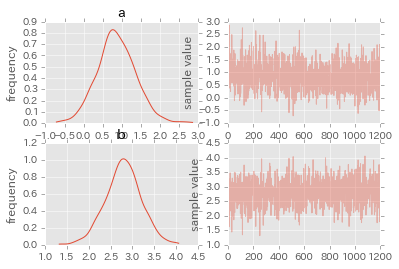

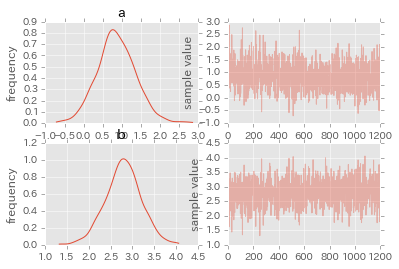

In [11]:
# runstan1b-post1.R
fit.plot()

In [12]:
# runstan1b-post2.R
la = fit.extract()
b_smp = la['b']
# 分位点 q は [0, 100] の範囲
np.percentile(b_smp, q=[2.5, 97.5]) 

array([ 1.97379905,  3.59263313])

In [13]:
# runstan2.Rl
np.random.seed(123)

T_new = np.linspace(0, 2.5, num=51)
T_new

array([ 0.  ,  0.05,  0.1 , ...,  2.4 ,  2.45,  2.5 ])

In [14]:
data = dict(N=N, T=T, Y=Y, N_new=len(T_new), T_new=T_new)
stanmodel = pystan.StanModel(file='model2.stan')

In [15]:
fit = stanmodel.sampling(data=data, iter=1000, warmup=200, chains=3)
fit

Inference for Stan model: anon_model_49d84219839a76dfcfe3489454603e22.
3 chains, each with iter=1000; warmup=200; thin=1; 
post-warmup draws per chain=800, total post-warmup draws=2400.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a               0.8    0.01   0.53   -0.2   0.46   0.78   1.14   1.83 2400.0    1.0
b              2.86  8.9e-3   0.44    2.0   2.58   2.86   3.14   3.73 2400.0    1.0
sigma          1.07  4.0e-3    0.2   0.76   0.93   1.05    1.2   1.52 2400.0    1.0
Y_hidden[0]    1.08    0.01   0.49   0.14   0.77   1.07   1.39   2.04 2400.0    1.0
Y_hidden[1]    1.37  9.2e-3   0.45    0.5   1.08   1.36   1.65   2.25 2400.0    1.0
Y_hidden[2]    1.65  8.5e-3   0.42   0.86   1.39   1.65   1.91   2.49 2400.0    1.0
Y_hidden[3]    1.94  7.8e-3   0.38   1.21    1.7   1.94   2.18   2.71 2400.0    1.0
Y_hidden[4]    2.23  7.1e-3   0.35   1.56   2.01   2.22   2.44   2.93 2400.0    1.0
Y_hidden[5]    2.51  6.5e-3   0.32   1.89   2.31   2.51  

In [16]:
# runstan1b-post2.R
la = fit.extract()
qua = np.percentile(la['Y_new'], q=[2.5, 25, 50, 75, 97.5], axis=0)
qua

array([[ -1.53107531e+00,  -1.41313034e+00,  -1.41092891e+00, ...,
          5.23615389e+00,   5.21789510e+00,   5.40255143e+00],
       [  1.05410869e-03,   1.56859437e-01,   3.00373149e-01, ...,
          6.84539114e+00,   6.93978602e+00,   7.04816592e+00],
       [  7.81951745e-01,   9.64572873e-01,   1.04824169e+00, ...,
          7.66455914e+00,   7.79030011e+00,   7.91511612e+00],
       [  1.55783713e+00,   1.79668201e+00,   1.86762626e+00, ...,
          8.45754543e+00,   8.62881902e+00,   8.75599437e+00],
       [  3.22042575e+00,   3.33059819e+00,   3.50700932e+00, ...,
          1.00599273e+01,   1.03187414e+01,   1.03632699e+01]])

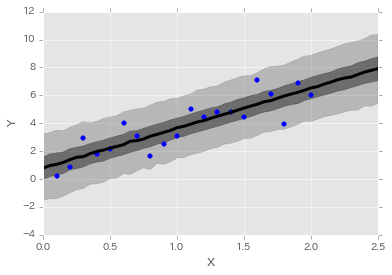

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(T_new, qua[2, :], color='black', linewidth=3)
ax.fill_between(T_new, qua[1, :], qua[3, :], color='black', alpha=0.4)
ax.fill_between(T_new, qua[0, :], qua[4, :], color='black', alpha=0.2)
ax.scatter(T, Y, color='blue')
ax.set_xlim(0, 2.5)
ax.set_xlabel('X')
ax.set_ylabel('Y');